In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# import
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, ReLU, BatchNormalization
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [ ]:
# load data


batch_size = 32
num_classes = 21
epochs = 70
IMG_HEIGHT, IMG_WIDTH = 80, 80

PATH = '/content/drive/My Drive/Colab Notebooks/data'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [ ]:
# 데이터 전처리(128x128)

train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=40,
                                           width_shift_range=.2,
                                           height_shift_range=.2,
                                          horizontal_flip=True,
                                          zoom_range=.2)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='categorical')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                             directory=validation_dir,
                                                             shuffle=True,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             class_mode='categorical')

Found 16824 images belonging to 21 classes.
Found 4189 images belonging to 21 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

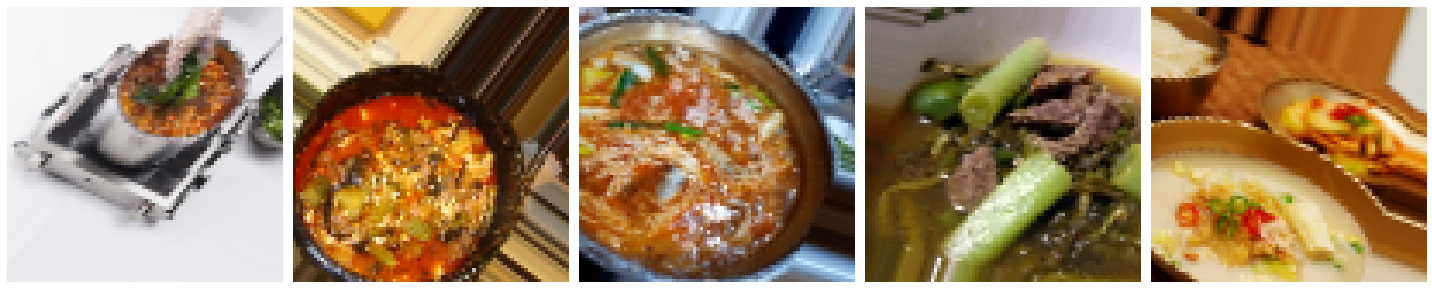

In [ ]:
# train data 확인

sample_training_images, _ = next(train_data_gen)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(sample_training_images[:5])

In [25]:
model = Sequential([
    Conv2D(32, 7, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, 5, activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(21, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 80, 80, 32)        4736      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 40, 40, 64)        51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12800)            

In [ ]:
# compile
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [ ]:
# 모델 생성

steps_per_epoch = int(16824/batch_size)

history = model.fit(
    train_data_gen,
    batch_size = batch_size,
    epochs = epochs,
    steps_per_epoch=steps_per_epoch,
    workers=4,
    validation_data=val_data_gen
)

Epoch 1/70
 22/525 [>.............................] - ETA: 2:00 - loss: 2.5352 - accuracy: 0.2116

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 4. 
  warnings.warn(str(msg))


444/525 [========================>.....] - ETA: 20s - loss: 2.4601 - accuracy: 0.2245

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41486
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)


525/525 [==============================] - 279s 531ms/step - loss: 2.4556 - accuracy: 0.2277 - val_loss: 2.3840 - val_accuracy: 0.2557
Epoch 2/70
525/525 [==============================] - 164s 312ms/step - loss: 2.3698 - accuracy: 0.2473 - val_loss: 2.3191 - val_accuracy: 0.2597
Epoch 3/70
525/525 [==============================] - 164s 313ms/step - loss: 2.2937 - accuracy: 0.2672 - val_loss: 2.2595 - val_accuracy: 0.2881
Epoch 4/70
525/525 [==============================] - 168s 320ms/step - loss: 2.2529 - accuracy: 0.2847 - val_loss: 2.1806 - val_accuracy: 0.3130
Epoch 5/70
525/525 [==============================] - 169s 322ms/step - loss: 2.1993 - accuracy: 0.3008 - val_loss: 2.3133 - val_accuracy: 0.2762
Epoch 6/70
525/525 [==============================] - 168s 320ms/step - loss: 2.1623 - accuracy: 0.3156 - val_loss: 2.0831 - val_accuracy: 0.3385
Epoch 7/70
525/525 [==============================] - 171s 325ms/step - loss: 2.1231 - accuracy: 0.3243 - val_loss: 2.2626 - val_accura

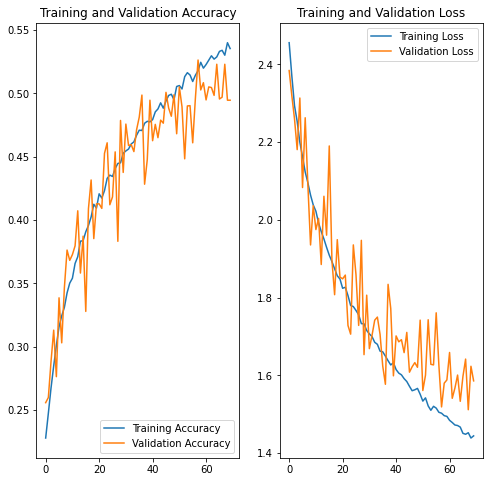

In [ ]:
# accuracy와 loss 그래프

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()